# K-Nearest Neighbors (KNN)

this model (*KNN*) is not mentioned in the book explicitly; but I thought it is important enough to dedicate a section to it

In [1]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

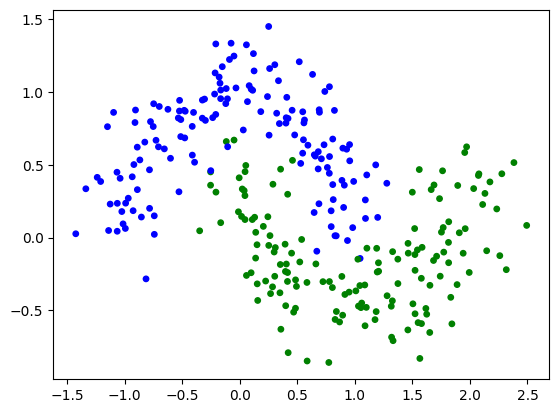

In [2]:
X, y = make_moons(n_samples=300, noise=0.18, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=['b' if y == 0 else 'g' for y in y], s=15)
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Scikit-Learn -- Classification

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# classification
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)
print('accuracy:', knn_clf.score(X_test, y_test) * 100, '%')

accuracy: 95.0 %


## Implementation

### Classification:
the model returns the **majority label** among the $k$ nearest neighbors

In [6]:
import statistics as st

class KNearestNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
        
        
    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_nearest_idxs = np.argsort(distances)[:self.n_neighbors]
        y_neighbors = self.y_train[k_nearest_idxs]
        majority_vote = st.mode(y_neighbors)
        return majority_vote
        
        
    def _euclidean_distance(self, x1, x2):
        distance = np.sqrt(np.sum((x1 - x2) ** 2))
        return distance

In [7]:
knn_clf = KNearestNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print('accuracy:', np.mean(y_test == y_pred) * 100, '%')

accuracy: 95.0 %


## Scikit-Learn -- Regression

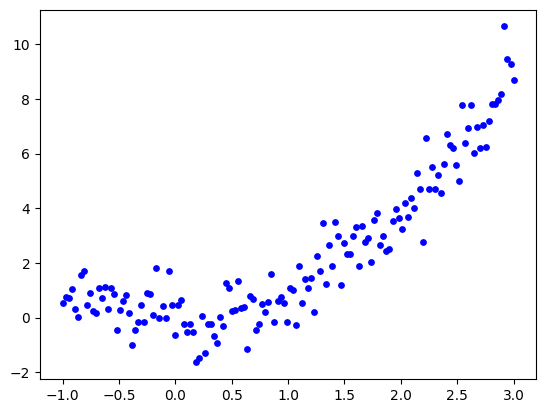

In [8]:
X = np.linspace(-1, 3, 150)
y = X ** 2 + 0.7 * np.random.randn(150)
X = X.reshape(-1, 1)

plt.scatter(X[:, 0], y, c='b', s=15)
plt.show()

In [9]:
from sklearn.neighbors import KNeighborsRegressor

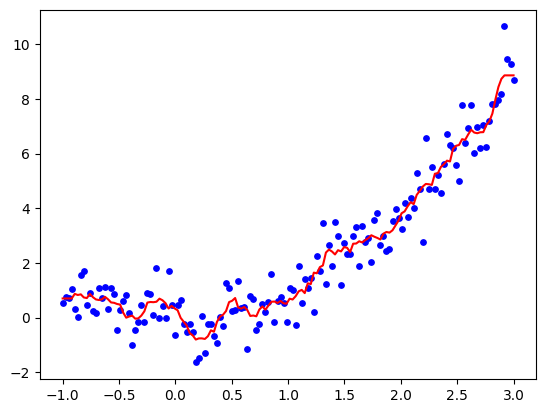

In [10]:
knn_reg = KNeighborsRegressor(n_neighbors=7)
knn_reg.fit(X, y)
y_pred = knn_reg.predict(X)

plt.scatter(X[:, 0], y, c='b', s=15)
plt.plot(X[:, 0], y_pred, c='r')
plt.show()

## Implementation

### Regression:
the model returns the **mean value** of the $k$ nearest neighbors

In [11]:
class KNearestNeighborsRegressor:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return y_pred
        
        
    def _predict(self, x):
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        k_nearest_idxs = np.argsort(distances)[:self.n_neighbors]
        y_neighbors = self.y_train[k_nearest_idxs]
        majority_vote = np.mean(y_neighbors)
        return majority_vote
        
        
    def _euclidean_distance(self, x1, x2):
        distance = np.sqrt(np.sum((x1 - x2) ** 2))
        return distance

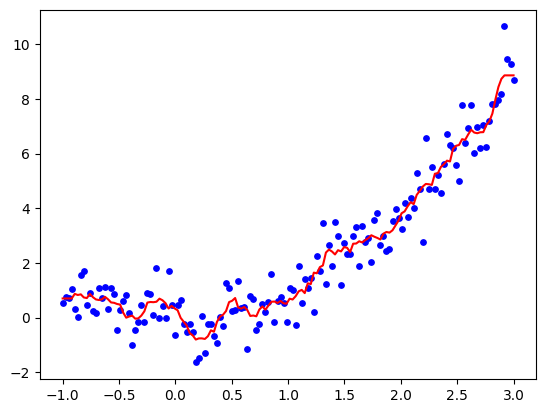

In [12]:
knn_reg = KNearestNeighborsRegressor(n_neighbors=7)
knn_reg.fit(X, y)
y_pred = knn_reg.predict(X)

plt.scatter(X[:, 0], y, c='b', s=15)
plt.plot(X[:, 0], y_pred, c='r')
plt.show()